In [1]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# load pre-processed data
data_dir = os.path.expanduser('../dataFiles/')
sub = pd.read_csv(data_dir + 'autobioMem_sub.csv')
subDate = pd.read_csv(data_dir + 'autobioMem_subDate.csv')
earlyRecall = pd.read_csv(data_dir + 'autobioMem_earlyRecall.csv')

## greater autobiographical memory for march 2020 (pandemic onset) across two years

In [4]:
# create month data-frame
df_monthProp = subDate[["subject","date","memProp_2020","memProp_2020_2021","memProp_2021"]]
df_month = df_monthProp.rename(columns = {"memProp_2020":'2020_in_2020',"memProp_2020_2021":'2020_in_2021',"memProp_2021":'2021_in_2021'})
df_month = pd.melt(df_month, id_vars = ['subject','date'], var_name = 'memProp', value_name = 'values')

In [5]:
df_sentProp = subDate[["subject","date","compound_2020","compound_2020_2021","compound_2021"]]
df_sent = df_sentProp.rename(columns = {"compound_2020":'2020_in_2020',"compound_2020_2021":'2020_in_2021',"compound_2021":'2021_in_2021'})
df_sent = pd.melt(df_sent, id_vars = ['subject','date'], var_name = 'sent', value_name = 'values')

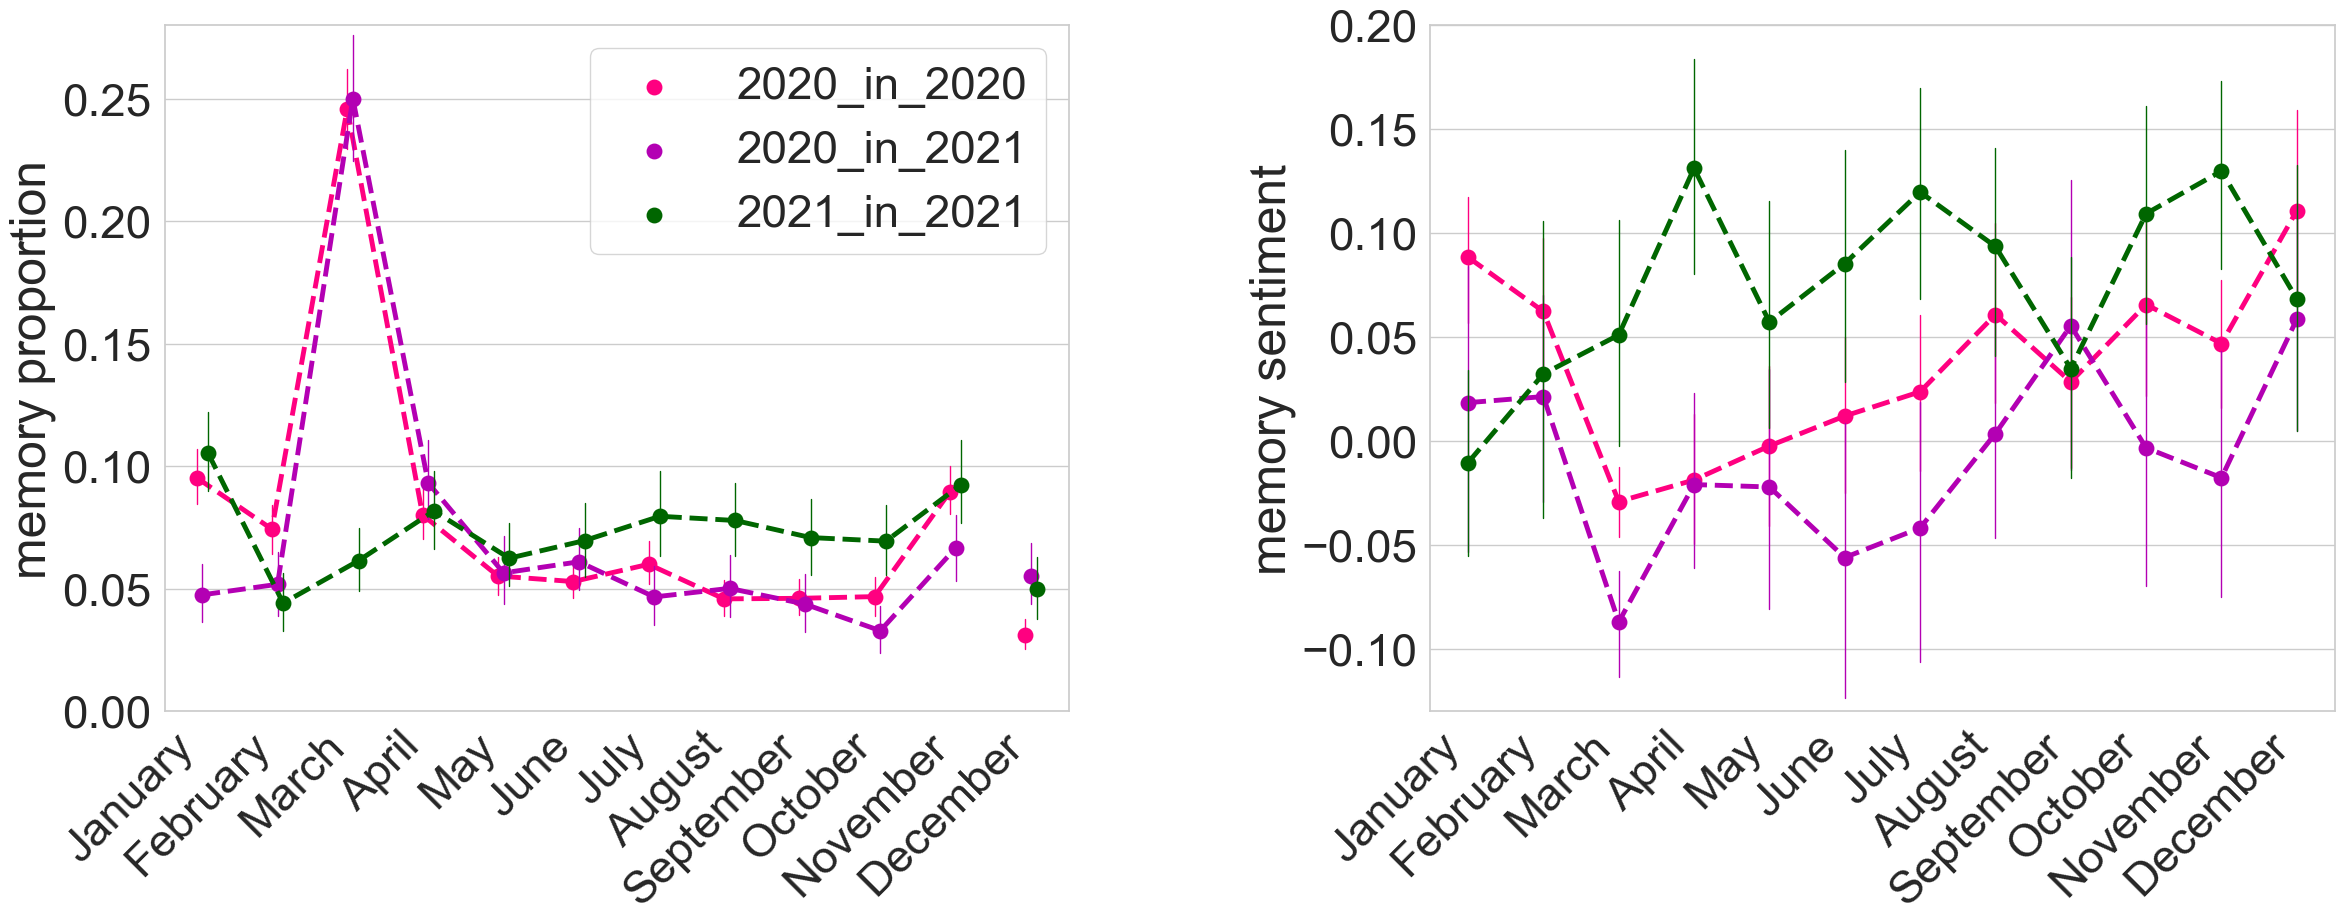

In [30]:
fig, (ax1,ax2)= plt.subplots(nrows = 1, ncols=2, figsize=(28,7))
plt.subplots_adjust(top = 0.99, bottom=0.01, hspace=0, wspace=0.4)
sns.set_theme(style="whitegrid", font_scale=3)

handles, labels = ax1.get_legend_handles_labels()

p1 = sns.pointplot(x="date", y="values", hue="memProp",dodge=0.15,errwidth=1,palette=["#ff0080","#b300b3","#006600"],scale=1.3,linestyles = ['--','--','--'],
                order = ['January','February','March','April','May','June','July','August','September','October','November','December'],
                data=df_month, ax = ax1)

# remove line between november and december (memory collected early december)
x1 = p1.lines[0].get_xdata()
y1 = p1.lines[0].get_ydata()
x1 = x1[0:11]
y1 = y1[0:11]
p1.lines[0].set_xdata(x1)
p1.lines[0].set_ydata(y1)

x2 = p1.lines[13].get_xdata()
y2 = p1.lines[13].get_ydata()
x2 = x2[0:11]
y2 = y2[0:11]
p1.lines[13].set_xdata(x2)
p1.lines[13].set_ydata(y2)

x3 = p1.lines[26].get_xdata()
y3 = p1.lines[26].get_ydata()
x3 = x3[0:11]
y3 = y3[0:11]
p1.lines[26].set_xdata(x3)
p1.lines[26].set_ydata(y3)

p1.set_xlabel("");
p1.set_ylabel("memory proportion");
ax1.set(ylim=(0, 0.28));
ax1.legend(handles=handles[0:], labels=labels[0:]);
plt.setp(ax1.get_xticklabels(), rotation=45, ha="right");

p2 = sns.pointplot(x="date", y="values", hue="sent",errwidth=1,palette=["#ff0080","#b300b3","#006600"],scale=1.3,linestyles = ['--','--','--'],
                order = ['January','February','March','April','May','June','July','August','September','October','November','December'],
                data=df_sent, ax = ax2)
p2.set_xlabel("");
p2.set_ylabel("memory sentiment");
ax2.set(ylim=(-0.13, 0.20));
ax2.get_legend().remove();
plt.setp(ax2.get_xticklabels(), rotation=45, ha="right");

## earlier recall of march 2020 memory

In [7]:
# prepare for plotting
earlyRecall_2020 = earlyRecall[earlyRecall['year']=='set_2020']
earlyRecall_2020_2021 = earlyRecall[earlyRecall['year']=='set_2020_2021']
earlyRecall_2021 = earlyRecall[earlyRecall['year']=='set_2021']

earlyRecall_2020 = pd.melt(earlyRecall_2020, id_vars=['date'], value_vars=["average","first recall","second recall","third recall"])
earlyRecall_2020_2021 = pd.melt(earlyRecall_2020_2021, id_vars=['date'], value_vars=["average","first recall","second recall","third recall"])
earlyRecall_2021 = pd.melt(earlyRecall_2021, id_vars=['date'], value_vars=["average","first recall","second recall","third recall"])

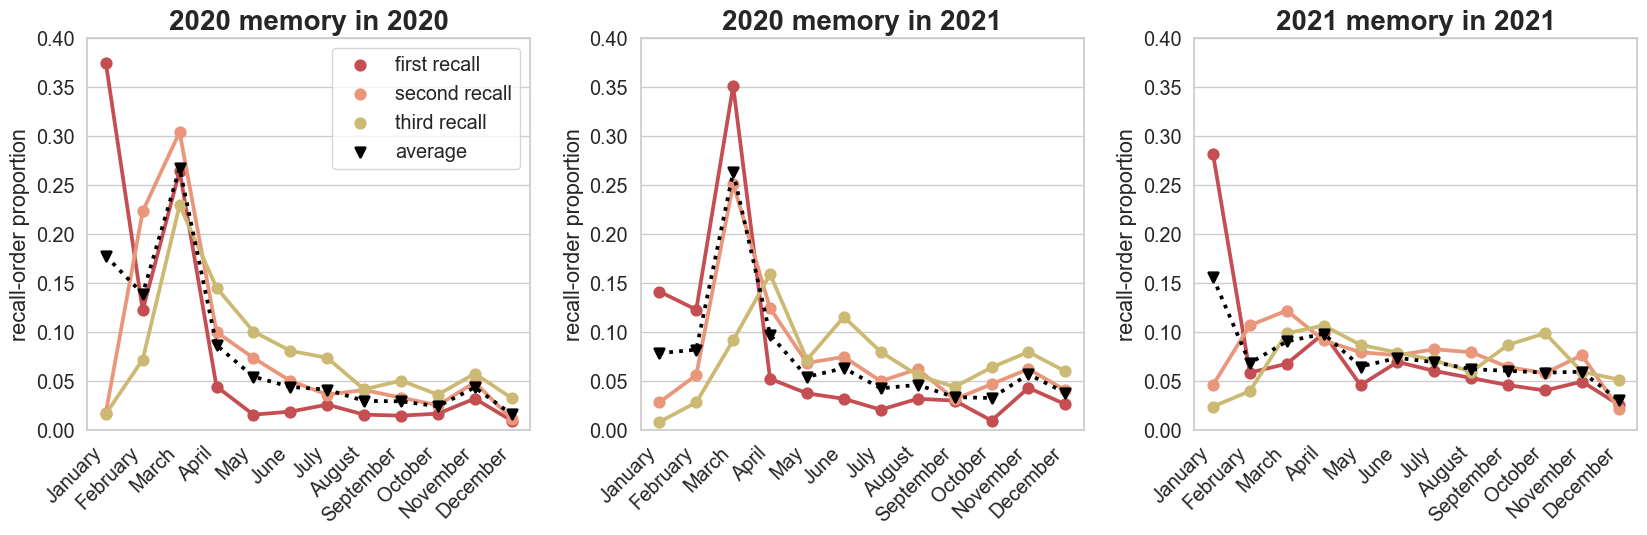

In [28]:
# plot
fig, (ax1,ax2,ax3)= plt.subplots(nrows = 1, ncols=3, figsize=(20,4))
plt.subplots_adjust(top = 0.99, bottom=0.01, hspace=0, wspace=0.25)
sns.set_theme(style="whitegrid", font_scale=1.3)

p1 = sns.pointplot(x="date", y="value",hue="variable", markers=['o', 'o', 'o', 'v'], linestyles = ['-', '-', '-', ':'],
                hue_order = ["first recall","second recall","third recall","average"], palette=['r','#E9967A','y','#000000'],
                order = ['January','February','March','April','May','June','July','August','September','October','November','December'],
                data=earlyRecall_2020, ax  = ax1)
p1.set_title('2020 memory in 2020',fontdict= { 'fontsize': 20, 'fontweight':'bold'})
p1.set_xlabel("");
p1.set_ylabel("recall-order proportion");
plt.setp(ax1.get_xticklabels(), rotation=45,ha="right");
handles, labels = ax1.get_legend_handles_labels()
ax1.legend(handles=handles[0:], labels=labels[0:]);
ax1.set(ylim=(0, 0.4));

p2 = sns.pointplot(x="date", y="value", hue="variable", markers=['o', 'o', 'o', 'v'], linestyles = ['-', '-', '-', ':'],
                hue_order = ["first recall","second recall","third recall","average"], palette=['r','#E9967A','y','#000000'],
                order = ['January','February','March','April','May','June','July','August','September','October','November','December'],
                data=earlyRecall_2020_2021, ax  = ax2)
p2.set_title('2020 memory in 2021',fontdict= { 'fontsize': 20, 'fontweight':'bold'})
p2.set_xlabel("");
p2.set_ylabel("recall-order proportion");
ax2.set(ylim=(0, 0.4));
plt.setp(ax2.get_xticklabels(), rotation=45,ha="right");
ax2.get_legend().remove();

p3 = sns.pointplot(x="date", y="value",hue="variable", markers=['o', 'o', 'o', 'v'], linestyles = ['-', '-', '-', ':'],
                hue_order = ["first recall","second recall","third recall","average"], palette=['r','#E9967A','y','#000000'],
                order = ['January','February','March','April','May','June','July','August','September','October','November','December'],
                data=earlyRecall_2021, ax  = ax3)
p3.set_title('2021 memory in 2021',fontdict= { 'fontsize': 20, 'fontweight':'bold'})
p3.set_xlabel("");
p3.set_ylabel("recall-order proportion");
ax3.get_legend().remove();
ax3.set(ylim=(0, 0.4));
plt.setp(ax3.get_xticklabels(), rotation=45,ha="right");

## negative affective state increased likelihood of later retrieving that month

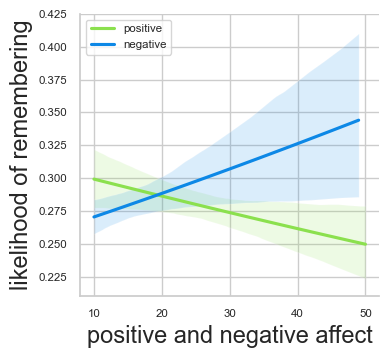

In [9]:
# PANAS - change frame 
df_PANAS = subDate[["lik_2020","monthly_PANAS_pos","monthly_PANAS_neg"]]
df_PANAS = pd.melt(df_PANAS, id_vars = 'lik_2020', var_name = 'PANAS', value_name = 'values')
df_PANAS['PANAS'] = np.where(df_PANAS['PANAS']=="monthly_PANAS_pos","positive","negative")
df_PANAS = df_PANAS.dropna()


# PANAS 2020 plot (have to plot lmplot separately)
sns.set_theme(style="whitegrid", font_scale=0.75)
p1 = sns.lmplot(x="values", y="lik_2020", hue="PANAS", logistic=True, data=df_PANAS,scatter = False, height = 3.5, aspect = 1.1, 
       palette=dict(positive = '#8be04e', negative = "#0d88e6"),legend=False);
p1.set_axis_labels("positive and negative affect","likelihood of remembering",fontsize=17);
p1.set(ylim=(0.21, 0.425))
plt.legend(loc='upper left');

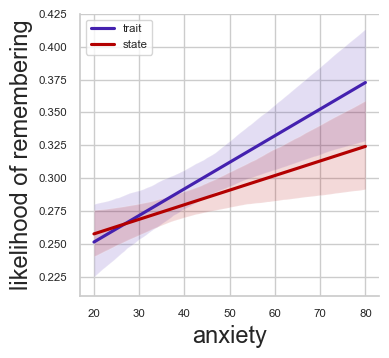

In [10]:
df_STAI = subDate[["lik_2020","monthly_STAI_trait","monthly_STAI_state"]]
df_STAI = pd.melt(df_STAI, id_vars = 'lik_2020', var_name = 'STAI', value_name = 'values')
df_STAI['STAI'] = np.where(df_STAI['STAI']=="monthly_STAI_trait","trait","state")

p1 = sns.lmplot(x="values", y="lik_2020", hue="STAI", data=df_STAI,scatter = False, height = 3.5, aspect = 1.1, 
       palette=dict(trait = "#4421af", state = "#b30000"),legend=False);
p1.set_axis_labels("anxiety","likelihood of remembering",fontsize=17);
p1.set(ylim=(0.21, 0.425))
plt.legend(loc='upper left');

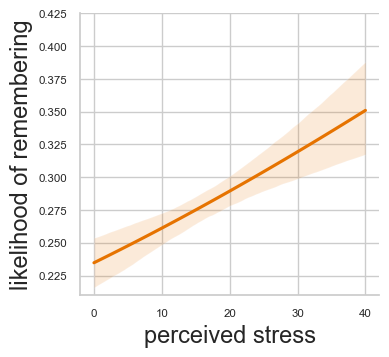

In [11]:
p1 = sns.lmplot(x="monthly_PSS", y="lik_2020",logistic=True,line_kws={'color': "#e67300"},data=subDate,scatter = False, height = 3.5, aspect = 1.1);
p1.set_axis_labels("perceived stress","likelihood of remembering",fontsize=17);
p1.set(ylim=(0.21, 0.425));

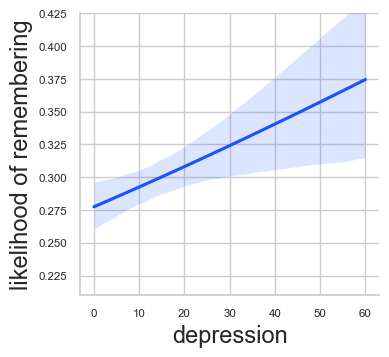

In [12]:
p1 = sns.lmplot(x="monthly_BDI", y="lik_2020", logistic=True,line_kws={'color': '#1a53ff'},data=subDate,scatter = False, height = 3.5, aspect = 1.1);
p1.set_axis_labels("depression","likelihood of remembering",fontsize=17);
p1.set(ylim=(0.21, 0.425));

# memory sentiment ~ monthly affect

In [13]:
# PANAS - change frame 
df_PANAS = subDate[["compound_2020","monthly_PANAS_pos","monthly_PANAS_neg"]]
df_PANAS = pd.melt(df_PANAS, id_vars = 'compound_2020', var_name = 'PANAS', value_name = 'values')
df_PANAS['PANAS'] = np.where(df_PANAS['PANAS']=="monthly_PANAS_pos","positive","negative")
df_PANAS = df_PANAS.dropna()

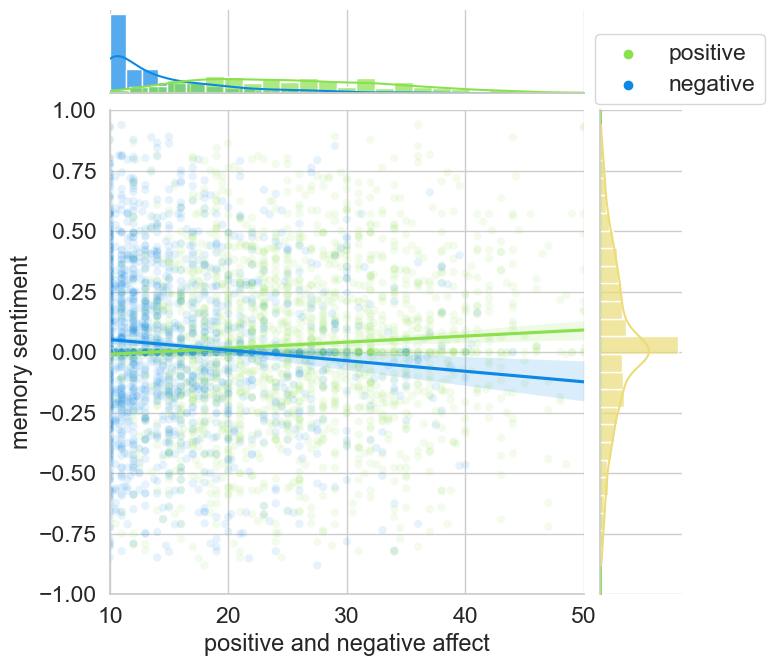

In [14]:
# PANAS 2020 plot (have to plot jointplot separately)
sns.set_theme(style="whitegrid",font_scale=1.5)

p1 = sns.jointplot(x="values", y="compound_2020", data=df_PANAS, hue="PANAS", height=7, alpha = 0.1, palette=dict(positive = '#8be04e', negative = "#0d88e6"))
p1.ax_marg_x.set_xlim(10, 50)
p1.ax_marg_y.set_ylim(-1, 1)
p1.ax_joint.legend(bbox_to_anchor=(1, 1.18), loc='upper left')

sns.histplot(y=df_PANAS['compound_2020'],ax=p1.ax_marg_y,color="#ebdc78",kde=True, alpha=0.7,bins=25)
sns.histplot(df_PANAS.loc[df_PANAS['PANAS']=="negative",'values'],ax=p1.ax_marg_x,color="#0d88e6",kde=True, alpha=0.7,bins=25)
sns.histplot(df_PANAS.loc[df_PANAS['PANAS']=="positive",'values'],ax=p1.ax_marg_x,color="#8be04e",kde=True, alpha=0.7,bins=25)

#for _,gr in df_PANAS.groupby("PANAS"):
    #sns.regplot(x="values", y="compound_2020", data=gr, scatter=False, ax=p1.ax_joint, truncate=False, color=next(colors))
sns.regplot(x="values", y="compound_2020", data=df_PANAS.loc[df_PANAS["PANAS"]=="positive",], scatter=False, ax=p1.ax_joint, truncate=False, color='#8be04e')
sns.regplot(x="values", y="compound_2020", data=df_PANAS.loc[df_PANAS["PANAS"]=="negative",], scatter=False, ax=p1.ax_joint, truncate=False, color='#0d88e6')

p1.set_axis_labels("positive and negative affect","memory sentiment",fontsize=17);

In [15]:
# STAI - change frame 
df_STAI = subDate[["compound_2020","monthly_STAI_trait","monthly_STAI_state"]]
df_STAI = pd.melt(df_STAI, id_vars = 'compound_2020', var_name = 'STAI', value_name = 'values')
df_STAI['STAI'] = np.where(df_STAI['STAI']=="monthly_STAI_trait","trait","state")

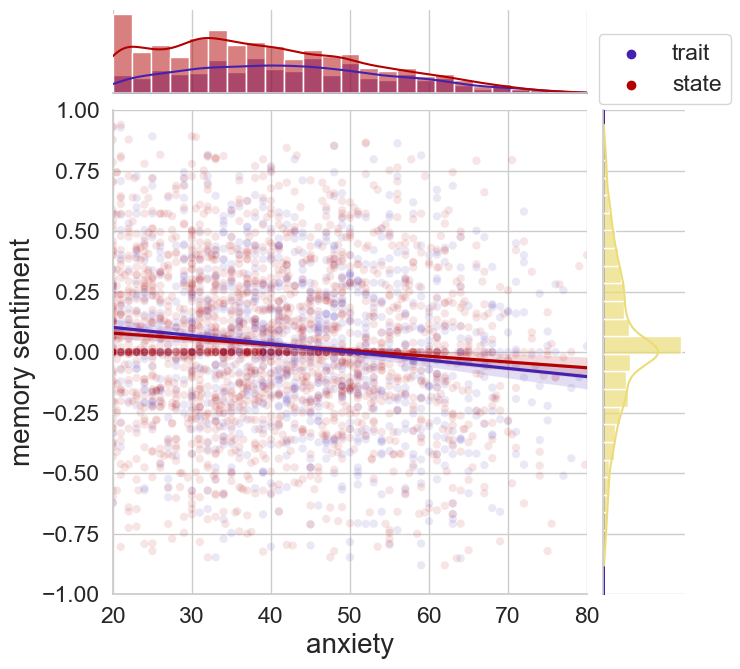

In [16]:
sns.set_theme(style="whitegrid",font_scale=1.5)

p1 = sns.jointplot(x="values", y="compound_2020", data=df_STAI, hue="STAI", height=7, alpha = 0.1, palette=dict(state = "#b30000", trait = "#4421af"))
p1.ax_marg_x.set_xlim(20, 80)
p1.ax_marg_y.set_ylim(-1, 1)
p1.ax_joint.legend(bbox_to_anchor=(1, 1.18), loc='upper left')

sns.histplot(y=df_STAI['compound_2020'],ax=p1.ax_marg_y,color='#ebdc78',kde=True,bins=25,alpha=0.7)
sns.histplot(df_STAI.loc[df_STAI['STAI']=="trait",'values'],ax=p1.ax_marg_x,color="#4421af",kde=True, alpha=0.5,bins=25)
sns.histplot(df_STAI.loc[df_STAI['STAI']=="state",'values'],ax=p1.ax_marg_x,color="#b30000",kde=True, alpha=0.5,bins=25)

#for _,gr in df_PANAS.groupby("PANAS"):
    #sns.regplot(x="values", y="compound_2020", data=gr, scatter=False, ax=p1.ax_joint, truncate=False, color=next(colors))
sns.regplot(x="values", y="compound_2020", data=df_STAI.loc[df_STAI["STAI"]=="state",], scatter=False, ax=p1.ax_joint, truncate=False, color="#b30000")
sns.regplot(x="values", y="compound_2020", data=df_STAI.loc[df_STAI["STAI"]=="trait",], scatter=False, ax=p1.ax_joint, truncate=False, color="#4421af")

p1.set_axis_labels("anxiety","memory sentiment",fontsize=20);

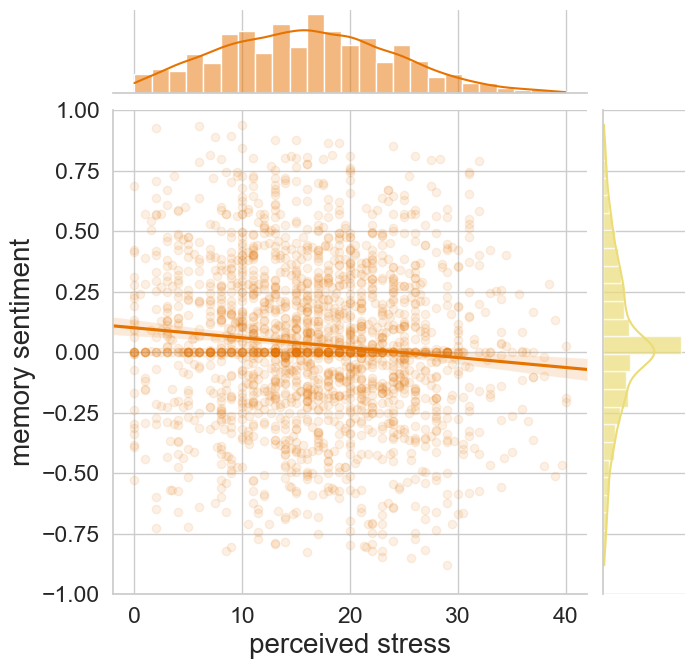

In [17]:
sns.set_theme(style="whitegrid",font_scale=1.5)

p1 = sns.jointplot(x="monthly_PSS", y="compound_2020", data=subDate,
                  kind="reg", truncate=False, color="#e67300", height=7,joint_kws = {'scatter_kws':dict(alpha=0.1)},marginal_kws=dict(bins=25))

p1.ax_marg_y.lines[0].set_color('#ebdc78')

for patch in p1.ax_marg_y.patches:
    patch.set_facecolor('#ebdc78') 
    patch.set_alpha(0.7) 

p1.ax_marg_y.set_ylim(-1, 1)
p1.set_axis_labels("perceived stress","memory sentiment",fontsize=20);

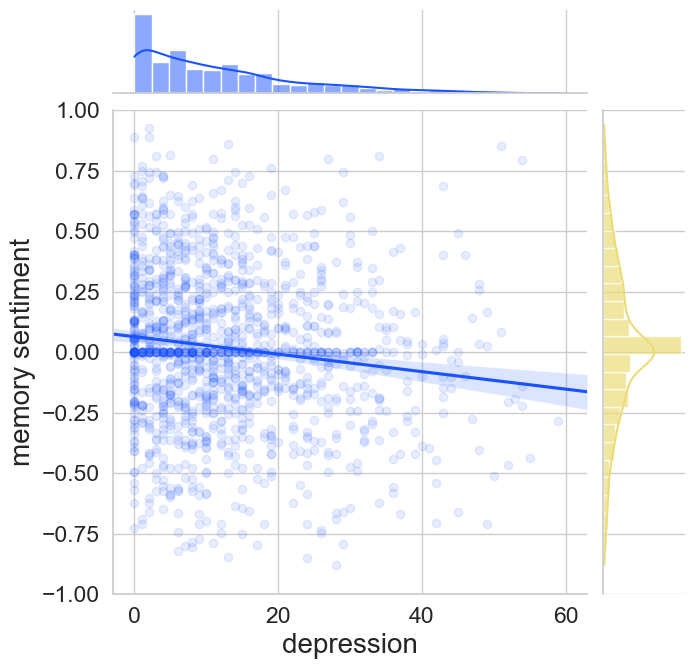

In [18]:
p1 = sns.jointplot(x="monthly_BDI", y="compound_2020", data=subDate,
                  kind="reg", truncate=False, color='#1a53ff', height=7,joint_kws = {'scatter_kws':dict(alpha=0.1)},marginal_kws=dict(bins=25))

p1.ax_marg_y.lines[0].set_color('#ebdc78')

for patch in p1.ax_marg_y.patches:
    patch.set_facecolor('#ebdc78') 
    patch.set_alpha(0.7) 

p1.ax_marg_y.set_ylim(-1, 1)
p1.set_axis_labels("depression","memory sentiment",fontsize=20);

## six factors predicted the amount and sentiment of recall

In [19]:
# create EFA data-frame
df_EFA = sub[["subject","posLow","negSelf","posSelf","negLow","posHigh","negHigh","memCount_total_2020","compound_avg_2020"]]
df_EFA = df_EFA.rename(columns = {'posLow':'pos_lowArousal','negSelf':'neg_self','posSelf':'pos_self','negLow':'neg_lowArousal','posHigh':'pos_highArousal','negHigh':'neg_highArousal'})
df_EFA = pd.melt(df_EFA, id_vars = ['subject','memCount_total_2020','compound_avg_2020'], var_name = 'EFA', value_name = 'values')

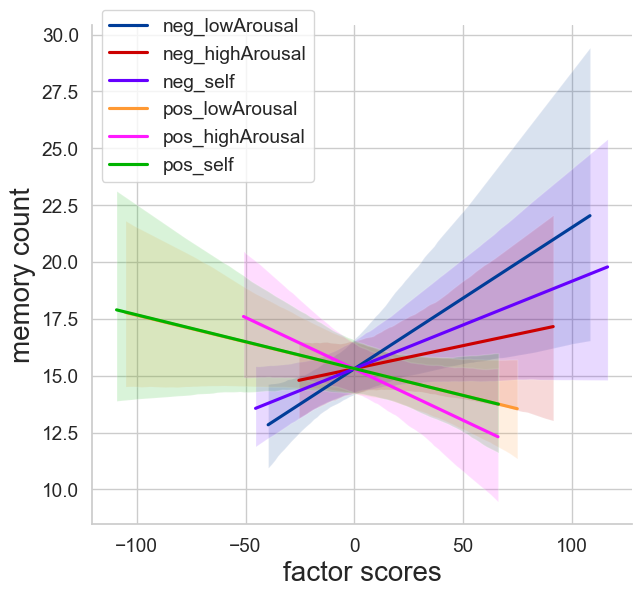

In [20]:
sns.set_theme(style="whitegrid", font_scale=1.25)

p1 = sns.lmplot(x="values", y="memCount_total_2020", hue="EFA", data=df_EFA,scatter = False, height = 6, aspect = 1.1,
               hue_order=['neg_lowArousal','neg_highArousal','neg_self','pos_lowArousal','pos_highArousal','pos_self'],
               palette=dict(pos_lowArousal = '#ff9933', neg_lowArousal = '#003d99',pos_highArousal='#ff1aff',neg_highArousal='#cc0000',pos_self='#00b300',neg_self='#6600ff'),
               legend=False);
p1.set_axis_labels("factor scores","memory count",fontsize=20);
plt.legend(bbox_to_anchor=(0, 1.05),loc='upper left');

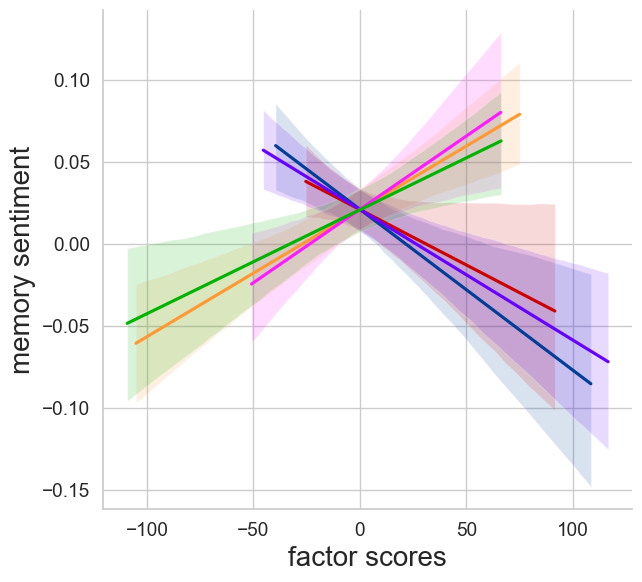

In [21]:
p1 = sns.lmplot(x="values", y="compound_avg_2020", hue="EFA", data=df_EFA,scatter = False, height = 6, aspect = 1.1,
               hue_order=['neg_lowArousal','neg_highArousal','neg_self','pos_lowArousal','pos_highArousal','pos_self'],
               palette=dict(pos_lowArousal = '#ff9933', neg_lowArousal = '#003d99',pos_highArousal='#ff1aff',neg_highArousal='#cc0000',pos_self='#00b300',neg_self='#6600ff'),
               legend=False);
p1.set_axis_labels("factor scores","memory sentiment",fontsize=20);

## PTSD predicted greater and more negative memories, especially for non-episodic details

In [22]:
df_PTSD = sub[["subject","intrusion_scaled","avoidance_scaled","neg_cognition_scaled","arousal_scaled",'memCount_total_2020','compound_avg_2020']]
df_PTSD = df_PTSD.rename(columns = {'intrusion_scaled':'intrusion','avoidance_scaled':'avoidance','neg_cognition_scaled':'neg_cognition','arousal_scaled':'arousal'})
df_PTSD = pd.melt(df_PTSD, id_vars = ['subject','memCount_total_2020','compound_avg_2020'], var_name = 'PTSD', value_name = 'values')

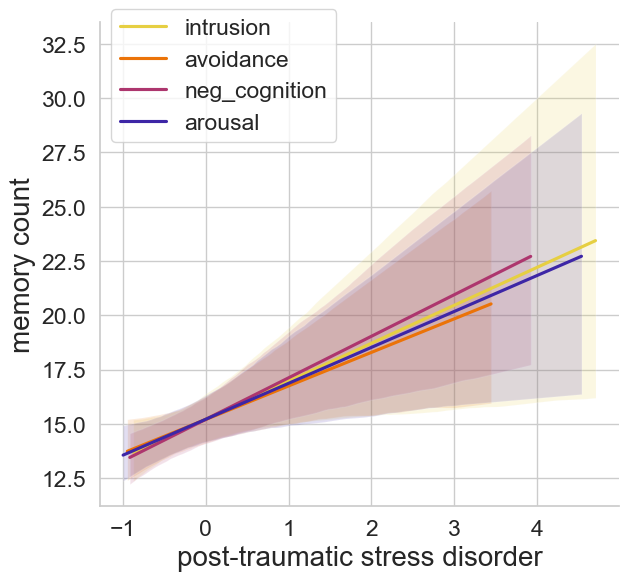

In [23]:
sns.set_theme(style="whitegrid",font_scale=1.5)
p1 = sns.lmplot(x="values", y="memCount_total_2020", hue="PTSD", data=df_PTSD,scatter = False, height = 6, aspect = 1.1,
               legend=False,palette="CMRmap_r");
p1.set_axis_labels("post-traumatic stress disorder","memory count",fontsize=20);
#p1.set(ylim=(0.16, 0.27))
plt.legend(bbox_to_anchor=(0, 1.05),loc='upper left');

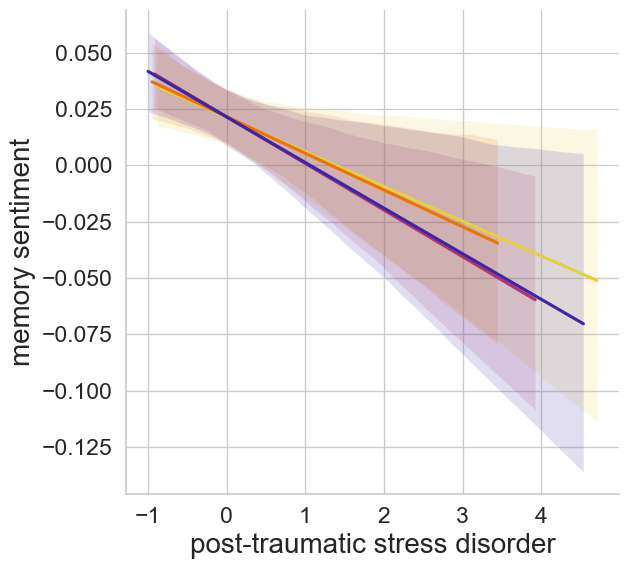

In [24]:
p1 = sns.lmplot(x="values", y="compound_avg_2020", hue="PTSD", data=df_PTSD,scatter = False, height = 6, aspect = 1.1,
               legend=False,palette="CMRmap_r");
p1.set_axis_labels("post-traumatic stress disorder","memory sentiment",fontsize=20);

## supplementary figure - full distribution - by month

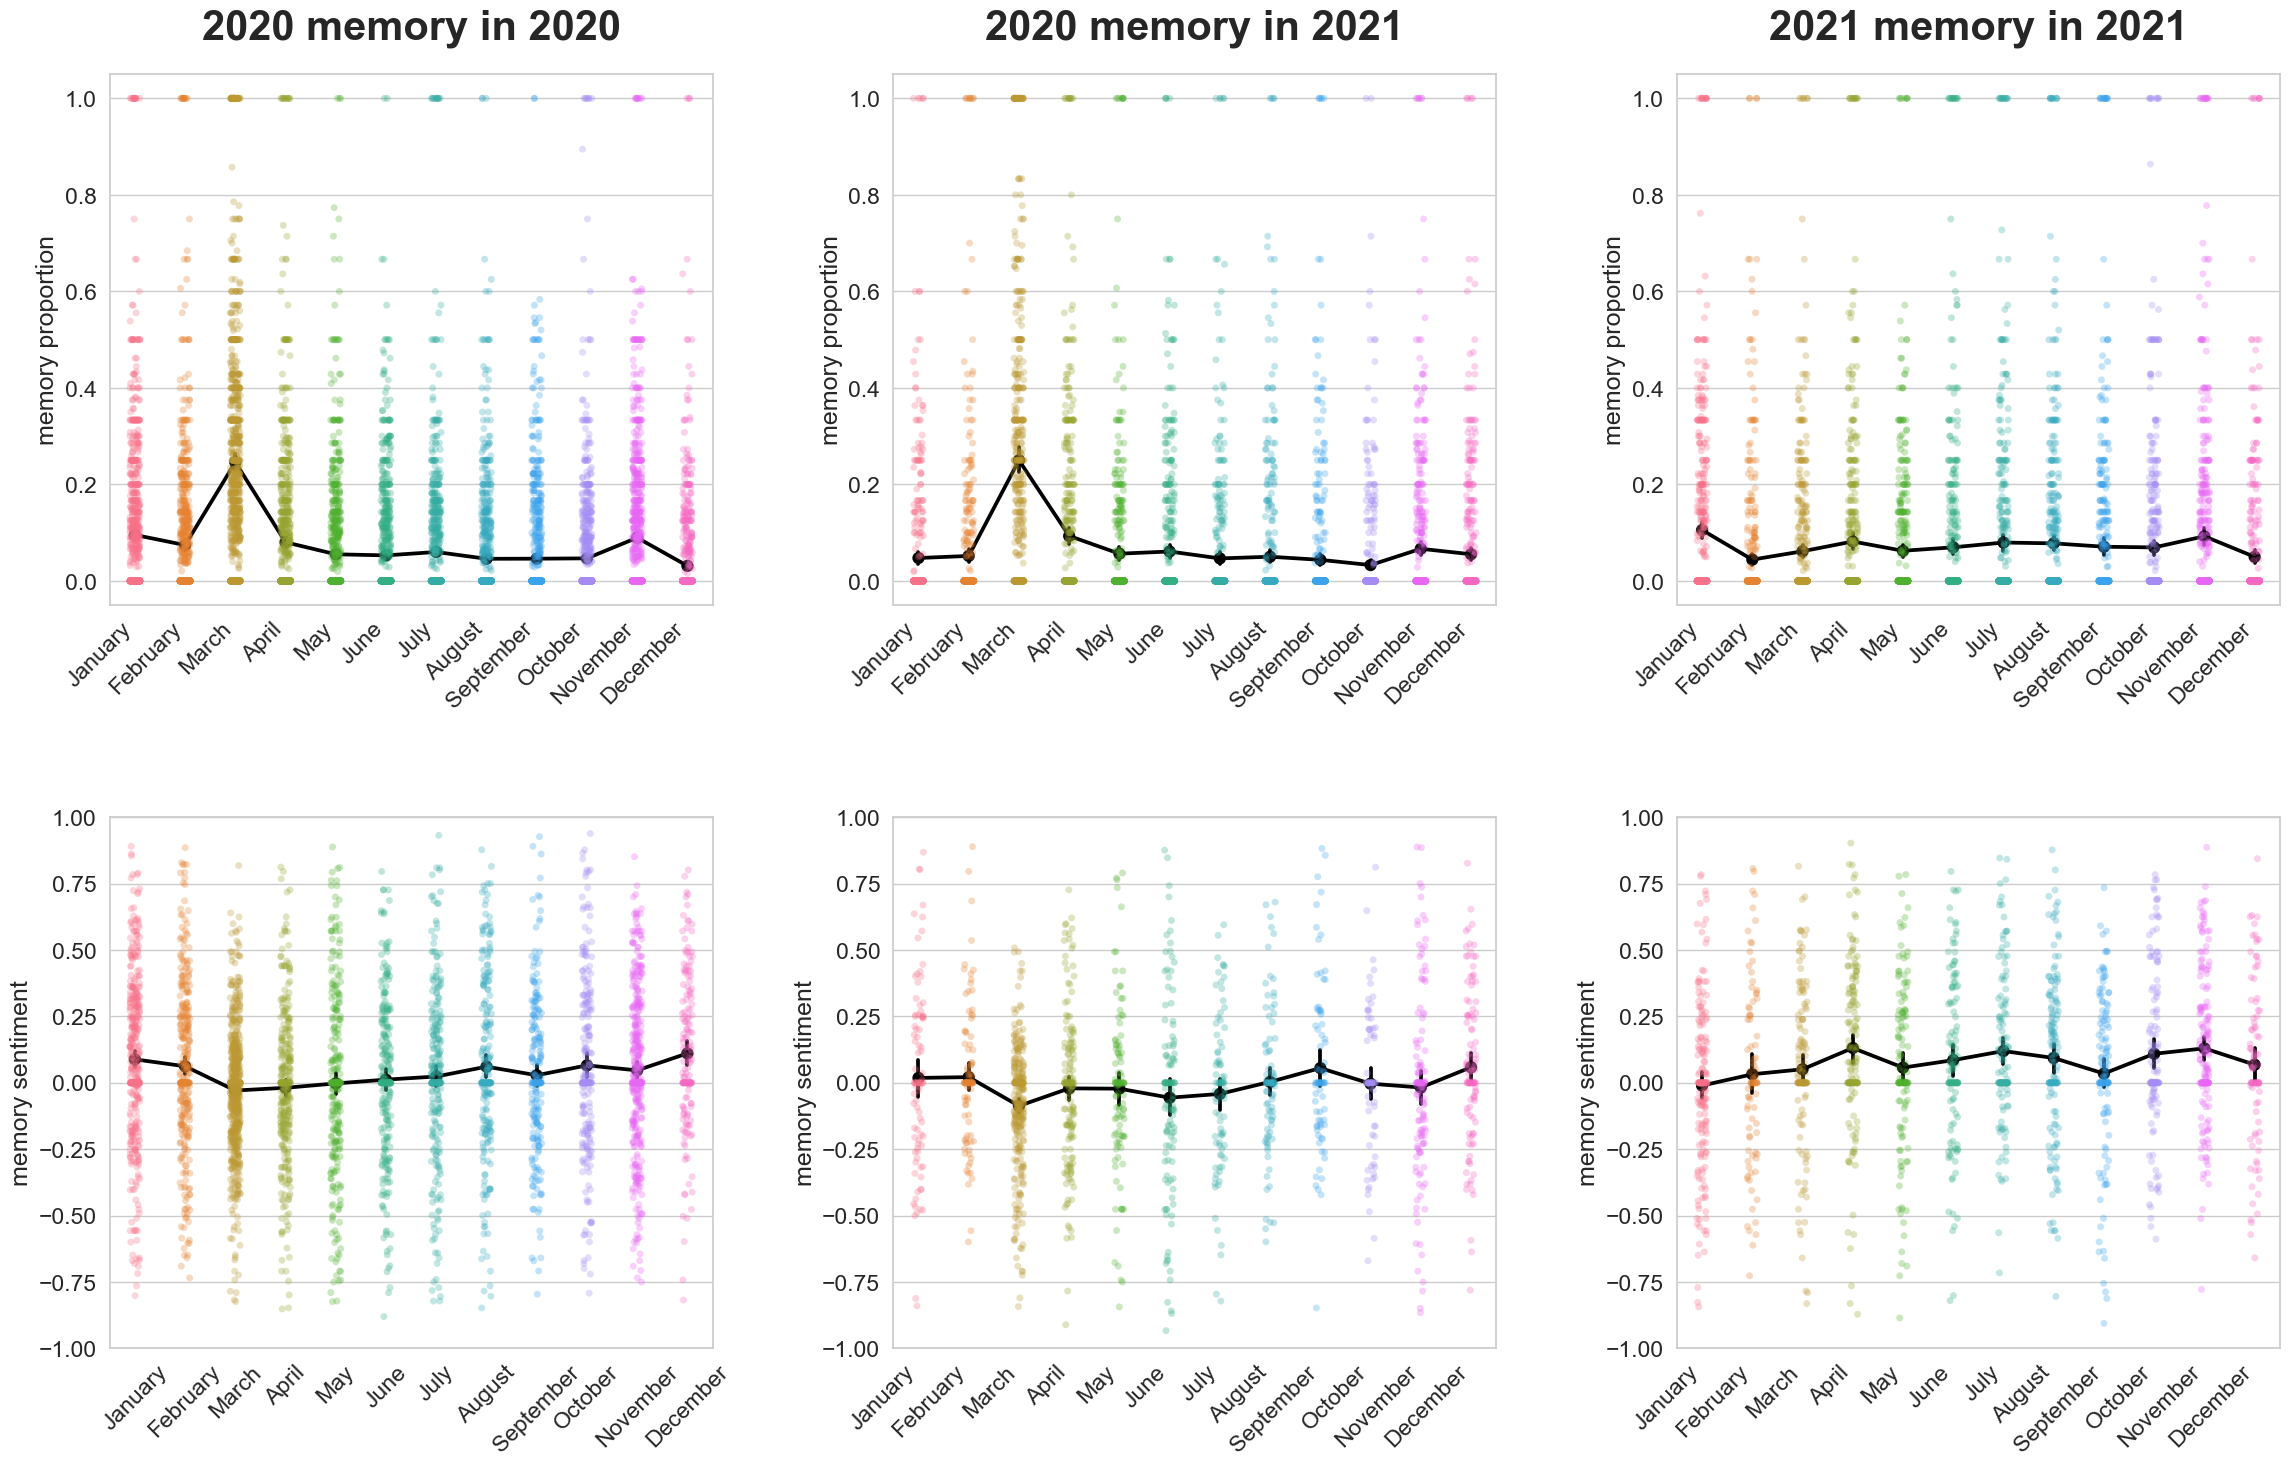

In [25]:
fig, ((ax1,ax2,ax3),(ax4,ax5,ax6)) = plt.subplots(nrows = 2, ncols=3, figsize=(28,13))
plt.subplots_adjust(top = 0.99, bottom=0.01, hspace=.4, wspace=0.3)
sns.set_theme(style="whitegrid", font_scale=2)

# month memory: full distribution
# 2020 in 2020
p1 = sns.stripplot(x="date", y="memProp_2020",alpha=0.3, hue="date",
                order = ['January','February','March','April','May','June','July','August','September','October','November','December'],
                hue_order = ['January','February','March','April','May','June','July','August','September','October','November','December'],
                palette="husl",legend=False,                
                data=subDate, ax = ax1)
p1 = sns.pointplot(x="date", y="memProp_2020",  color="black",
                order = ['January','February','March','April','May','June','July','August','September','October','November','December'],
                data=subDate,  ax = ax1)
p1.set_title('2020 memory in 2020',fontdict= { 'fontsize': 30, 'fontweight':'bold'},y=1.05)
p1.set_xlabel("");
p1.set_ylabel("memory proportion");
plt.setp(ax1.get_xticklabels(), rotation=45, ha="right");

# 2020 in 2021
p2 = sns.stripplot(x="date", y="memProp_2020_2021",alpha=0.3, hue="date",
                order = ['January','February','March','April','May','June','July','August','September','October','November','December'],
                hue_order = ['January','February','March','April','May','June','July','August','September','October','November','December'],
                palette="husl",legend=False,                
                data=subDate, ax = ax2)
p2 = sns.pointplot(x="date", y="memProp_2020_2021",  color="black",
                order = ['January','February','March','April','May','June','July','August','September','October','November','December'],
                data=subDate,  ax = ax2)
p2.set_title('2020 memory in 2021',fontdict= { 'fontsize': 30, 'fontweight':'bold'},y=1.05)
p2.set_xlabel("");
p2.set_ylabel("memory proportion");
plt.setp(ax2.get_xticklabels(), rotation=45, ha="right");

# 2021 in 2021
p3 = sns.stripplot(x="date", y="memProp_2021",alpha=0.3, hue="date",
                order = ['January','February','March','April','May','June','July','August','September','October','November','December'],
                hue_order = ['January','February','March','April','May','June','July','August','September','October','November','December'],
                palette="husl",legend=False,                
                data=subDate, ax = ax3)
p3 = sns.pointplot(x="date", y="memProp_2021",  color="black",
                order = ['January','February','March','April','May','June','July','August','September','October','November','December'],
                data=subDate,  ax = ax3)
p3.set_title('2021 memory in 2021',fontdict= { 'fontsize': 30, 'fontweight':'bold'},y=1.05)
p3.set_xlabel("");
p3.set_ylabel("memory proportion");
plt.setp(ax3.get_xticklabels(), rotation=45, ha="right");

# month memory: full distribution
# 2020 in 2020
p4 = sns.stripplot(x="date", y="compound_2020",alpha=0.3, hue="date",
                order = ['January','February','March','April','May','June','July','August','September','October','November','December'],
                hue_order = ['January','February','March','April','May','June','July','August','September','October','November','December'],
                palette="husl",legend=False,                
                data=subDate, ax = ax4)
p4 = sns.pointplot(x="date", y="compound_2020", color="black",
                order = ['January','February','March','April','May','June','July','August','September','October','November','December'],
                data=subDate, ax = ax4)
p4.set_title('',fontdict= { 'fontsize': 30, 'fontweight':'bold'},y=1.05)
p4.set_xlabel("");
p4.set_ylabel("memory sentiment");
ax4.set(ylim=(-1, 1));
plt.setp(ax4.get_xticklabels(), rotation=45);

# 2020 in 2021
p5 = sns.stripplot(x="date", y="compound_2020_2021",alpha=0.3,  hue="date",
                order = ['January','February','March','April','May','June','July','August','September','October','November','December'],
                hue_order = ['January','February','March','April','May','June','July','August','September','October','November','December'],
                palette="husl",legend=False,                
                data=subDate, ax = ax5)
p5 = sns.pointplot(x="date", y="compound_2020_2021", color="black",
                order = ['January','February','March','April','May','June','July','August','September','October','November','December'],
                data=subDate, ax = ax5)
p5.set_title('',fontdict= { 'fontsize': 30, 'fontweight':'bold'},y=1.05)
p5.set_xlabel("");
p5.set_ylabel("memory sentiment");
ax5.set(ylim=(-1, 1));
plt.setp(ax5.get_xticklabels(), rotation=45, ha="right");

# 2021 in 2021
p6 = sns.stripplot(x="date", y="compound_2021",alpha=0.3, hue="date",
                order = ['January','February','March','April','May','June','July','August','September','October','November','December'],
                hue_order = ['January','February','March','April','May','June','July','August','September','October','November','December'],
                palette="husl",legend=False,
                data=subDate, ax = ax6)
p6 = sns.pointplot(x="date", y="compound_2021", color="black",
                order = ['January','February','March','April','May','June','July','August','September','October','November','December'],
                data=subDate, ax = ax6)
p6.set_title('',fontdict= { 'fontsize': 30, 'fontweight':'bold'},y=1.05)
p6.set_xlabel("");
p6.set_ylabel("memory sentiment");
ax6.set(ylim=(-1, 1));
plt.setp(ax6.get_xticklabels(), rotation=45, ha="right");